<a href="https://colab.research.google.com/github/jmperalta89/codoacodo2021/blob/main/PUNTOS_VERDES_y_CAMPANAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En la Ciudad de Buenos Aires contamos con dos lugares donde dejar residuos para reciclar. Las campanas verdes, puntos fijos para depositar residuso y los puntos verdes, lugares atendidos por personas con un horario determinado. A continuacion veremos cuantos hay por comuna y como se distribuyen.

**CAMPANAS VERDES**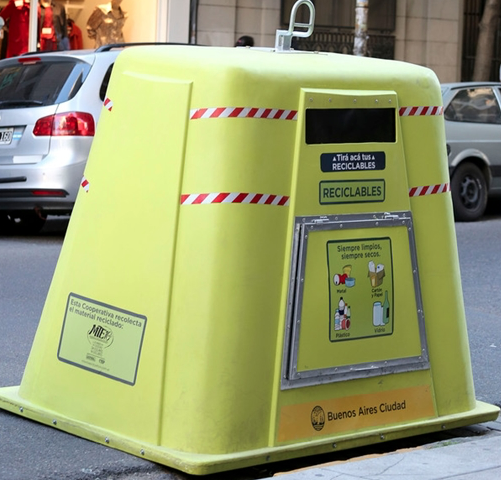

**PUNTOS VERDES**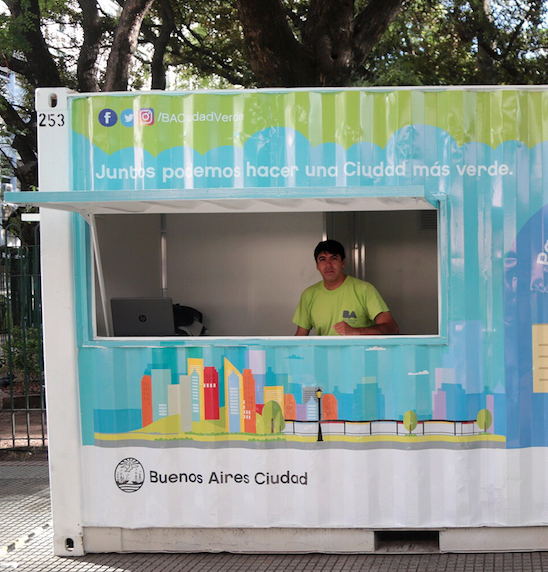

In [1]:
!pip install --upgrade plotly
#reiniciar

     |████████████████████████████████| 20.6 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
pip-compile


Usage:   
  pip3 <command> [options]

no such option: -c


In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import folium 

In [4]:
url='https://cdn.buenosaires.gob.ar/datosabiertos/datasets/agencia-de-proteccion-ambiental/puntos-verdes/puntos-verdes.csv'

In [5]:
data=pd.read_csv(url)

In [6]:
data.head(2)

WKT      id  ...    barrio     comuna
0   POINT (-58.464634598031 -34.5673114271266)  PV-073  ...  BELGRANO  COMUNA 13
1  POINT (-58.4247575949544 -34.5890926138789)  PV-081  ...   PALERMO  COMUNA 14

[2 rows x 14 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WKT         80 non-null     object 
 1   id          80 non-null     object 
 2   nombre      80 non-null     object 
 3   direccion   80 non-null     object 
 4   materiales  80 non-null     object 
 5   mas_info    80 non-null     object 
 6   dia_hora    80 non-null     object 
 7   tipo        80 non-null     object 
 8   cooperativ  80 non-null     object 
 9   calle       80 non-null     object 
 10  altura      7 non-null      float64
 11  calle2      73 non-null     object 
 12  barrio      80 non-null     object 
 13  comuna      80 non-null     object 
dtypes: float64(1), object(13)
memory usage: 8.9+ KB


In [8]:
data_filtrado = data.loc[:,['WKT', 'nombre','barrio','comuna'] ]  
data_filtrado

WKT  ...     comuna
0    POINT (-58.464634598031 -34.5673114271266)  ...  COMUNA 13
1   POINT (-58.4247575949544 -34.5890926138789)  ...  COMUNA 14
2   POINT (-58.4683708218154 -34.5470464523292)  ...  COMUNA 13
3   POINT (-58.5039885340967 -34.5763941135912)  ...  COMUNA 12
4   POINT (-58.4834187153287 -34.6296117832603)  ...  COMUNA 10
..                                          ...  ...        ...
75  POINT (-58.4768685819074 -34.5443034591689)  ...  COMUNA 12
76  POINT (-58.4770761350183 -34.5500695192027)  ...  COMUNA 12
77  POINT (-58.4060195134656 -34.6136312184285)  ...   COMUNA 3
78   POINT (-58.3963536828733 -34.629193592969)  ...   COMUNA 4
79   POINT (-58.4433288638415 -34.651102449447)  ...   COMUNA 7

[80 rows x 4 columns]

In [9]:
data_filtrado['barrio'].value_counts()

FLORES                 6
SAAVEDRA               5
PALERMO                4
CABALLITO              4
BELGRANO               4
LINIERS                3
VILLA URQUIZA          3
MONTE CASTRO           3
BALVANERA              3
VERSALLES              2
PARQUE PATRICIOS       2
FLORESTA               2
LUGANO                 2
VILLA DEVOTO           2
VILLA PUEYRREDON       2
SAN CRISTOBAL          2
RECOLETA               2
COLEGIALES             2
MATADEROS              2
NUÑEZ                  2
VELEZ SARSFIELD        2
PARQUE AVELLANEDA      2
BARRACAS               2
VILLA DEL PARQUE       1
VILLA REAL             1
LA BOCA                1
BOEDO                  1
SAN TELMO              1
ALMAGRO                1
POMPEYA                1
PARQUE CHACABUCO       1
PARQUE CHAS            1
VILLA CRESPO           1
VILLA RIACHUELO        1
CHACARITA              1
VILLA OTUZAR           1
VILLA GENERAL MITRE    1
CONSTITUCION           1
VILLA SOLDATI          1
RETIRO                 1


In [10]:
muestra = pd.DataFrame({
                      'Cantidad_por_barrio':data_filtrado['barrio'].value_counts()
                      })


In [11]:
muestra.index = data_filtrado['barrio'].value_counts().index

In [12]:
muestra.head()

Cantidad_por_barrio
FLORES                       6
SAAVEDRA                     5
PALERMO                      4
CABALLITO                    4
BELGRANO                     4

In [13]:
muestra = muestra.reset_index()

muestra.head(2)

index  Cantidad_por_barrio
0    FLORES                    6
1  SAAVEDRA                    5

In [14]:
#df.rename(columns = {'$b':'B'}, inplace = True)

muestra.rename(columns= {'index':'Barrios'}, inplace = True)
muestra.head(2)

Barrios  Cantidad_por_barrio
0    FLORES                    6
1  SAAVEDRA                    5

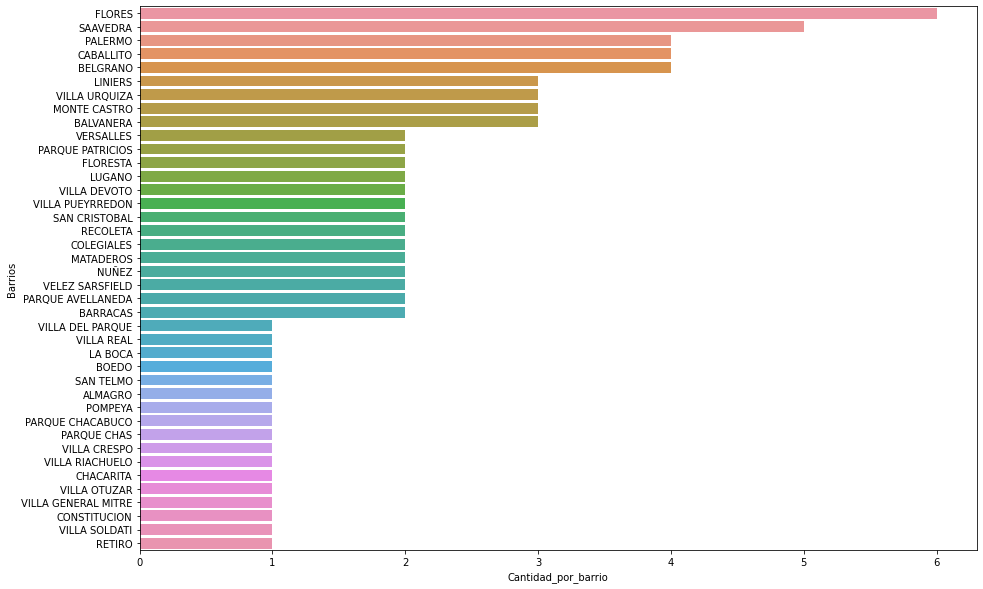

In [15]:
plt.figure(figsize= (15,10))
sns.barplot(y="Barrios", x="Cantidad_por_barrio", data=muestra)
plt.show()

In [16]:
data_filtrado['longitud']=''
data_filtrado['latitud']=''



In [17]:
data_filtrado.head(3)

WKT          nombre  ... longitud latitud
0   POINT (-58.464634598031 -34.5673114271266)  PLAZA CASTELLI  ...                 
1  POINT (-58.4247575949544 -34.5890926138789)   PLAZA ARMENIA  ...                 
2  POINT (-58.4683708218154 -34.5470464523292)  PLAZA BALCARCE  ...                 

[3 rows x 6 columns]

In [18]:
#longitud
[float(i.split(" ")[1:3][0].replace("(","")) for i in data_filtrado["WKT"]]

[-58.464634598031,
 -58.4247575949544,
 -58.4683708218154,
 -58.5039885340967,
 -58.4834187153287,
 -58.5164511523164,
 -58.4697701858878,
 -58.4428212518265,
 -58.4190248441798,
 -58.3746262620514,
 -58.4038250276177,
 -58.3758630255791,
 -58.4330506142859,
 -58.4819399162085,
 -58.4631006903741,
 -58.4936706207135,
 -58.3978974923583,
 -58.4126899761199,
 -58.4752020922909,
 -58.449262273857,
 -58.4161035645719,
 -58.4546826447819,
 -58.5125938878895,
 -58.5085445990707,
 -58.4817507018098,
 -58.4642362318725,
 -58.4341927502845,
 -58.4046401403741,
 -58.4586040253146,
 -58.4876433512469,
 -58.5205635840229,
 -58.4680785838005,
 -58.4736949750693,
 -58.4844776354102,
 -58.4453107369556,
 -58.4893209319339,
 -58.5204283597567,
 -58.4842919488629,
 -58.4472357685429,
 -58.397764371141,
 -58.3913549848406,
 -58.4071985529688,
 -58.3887439890382,
 -58.4561543108361,
 -58.5009967461534,
 -58.4754548123401,
 -58.4447765395503,
 -58.4039729161498,
 -58.3819510762102,
 -58.4160833225284,
 -5

In [19]:
#latitud
[float(i.split(" ")[1:3][1].replace(")","")) for i in data_filtrado["WKT"]]

[-34.5673114271266,
 -34.5890926138789,
 -34.5470464523292,
 -34.5763941135912,
 -34.6296117832603,
 -34.6494611405422,
 -34.6644631774234,
 -34.6358226883811,
 -34.6052794065506,
 -34.6375860364289,
 -34.6171243389801,
 -34.6221775195749,
 -34.6064458661756,
 -34.5515398593451,
 -34.5803265318524,
 -34.605547824347,
 -34.6113883782966,
 -34.6220542254795,
 -34.6878859302668,
 -34.5919093816859,
 -34.5893590937859,
 -34.5618041154275,
 -34.6003804201567,
 -34.6263932944959,
 -34.6430586487105,
 -34.6280612019433,
 -34.6174901201364,
 -34.6242434222341,
 -34.6137026244554,
 -34.5600091415174,
 -34.6280588688275,
 -34.6102003550235,
 -34.6212350762077,
 -34.5876698993872,
 -34.6048632280585,
 -34.5720354437169,
 -34.6573485595094,
 -34.6474575933788,
 -34.5392957558842,
 -34.5885011310972,
 -34.5987081339839,
 -34.6259656145078,
 -34.6508854106456,
 -34.6215058115323,
 -34.5909186558872,
 -34.5732502136624,
 -34.5809404325573,
 -34.5768692458954,
 -34.6265847826438,
 -34.6519843159488,
 

In [20]:
data_filtrado['longitud'] = [float(i.split(" ")[1:3][0].replace("(","")) for i in data_filtrado["WKT"]]

In [21]:
data_filtrado['latitud'] = [float(i.split(" ")[1:3][1].replace(")","")) for i in data_filtrado["WKT"]]

In [22]:
data_filtrado.head()

WKT  ...    latitud
0   POINT (-58.464634598031 -34.5673114271266)  ... -34.567311
1  POINT (-58.4247575949544 -34.5890926138789)  ... -34.589093
2  POINT (-58.4683708218154 -34.5470464523292)  ... -34.547046
3  POINT (-58.5039885340967 -34.5763941135912)  ... -34.576394
4  POINT (-58.4834187153287 -34.6296117832603)  ... -34.629612

[5 rows x 6 columns]

In [23]:
from folium.plugins import MarkerCluster


In [25]:
lat_ini =  -34.6296117832603
long_ini = -58.4834187153287
zoom = 12

map = folium.Map( location=[lat_ini,long_ini]  , zoom_start=zoom  )
marker_cluster = MarkerCluster().add_to(map)


for i in range(data_filtrado.shape[0]):
  lat_ = data_filtrado.loc[i,'latitud']
  long_ = data_filtrado.loc[i,'longitud']
  folium.Marker(  location=[ lat_ , long_ ], icon=folium.Icon(icon='glyphicon-trash',color='green')).add_to(marker_cluster)



map

In [40]:
url2= 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/subsecretaria-de-higiene-urbana/campanas-verdes/campanas-verdes.csv'

In [41]:
data2=pd.read_csv(url2)

In [42]:
data2.head()

WKT  ...                                    mas_info
0  POINT (-58.4436445327415 -34.5893377789048)  ...  Los materiales deben estar limpios y secos
1  POINT (-58.5056729127257 -34.6223361926404)  ...  Los materiales deben estar limpios y secos
2  POINT (-58.4129892741202 -34.6451594110446)  ...  Los materiales deben estar limpios y secos
3  POINT (-58.5267564075838 -34.6083119977315)  ...  Los materiales deben estar limpios y secos
4  POINT (-58.4307505291444 -34.5991248058184)  ...  Los materiales deben estar limpios y secos

[5 rows x 6 columns]

In [43]:
#longitud
data2['longitud'] = [float(i.split(" ")[1:3][0].replace("(","")) for i in data2["WKT"]]

In [44]:
#latitud
data2['latitud'] = [float(i.split(" ")[1:3][1].replace(")","")) for i in data2["WKT"]]

In [45]:
data2

WKT  ...    latitud
0     POINT (-58.4436445327415 -34.5893377789048)  ... -34.589338
1     POINT (-58.5056729127257 -34.6223361926404)  ... -34.622336
2     POINT (-58.4129892741202 -34.6451594110446)  ... -34.645159
3     POINT (-58.5267564075838 -34.6083119977315)  ... -34.608312
4     POINT (-58.4307505291444 -34.5991248058184)  ... -34.599125
...                                           ...  ...        ...
2969  POINT (-58.4729633773137 -34.5720891229715)  ... -34.572089
2970  POINT (-58.4728869384186 -34.5730334040781)  ... -34.573033
2971  POINT (-58.4725427039566 -34.5708291790821)  ... -34.570829
2972  POINT (-58.4820045761137 -34.5715381118424)  ... -34.571538
2973  POINT (-58.4490418406134 -34.5627481299131)  ... -34.562748

[2974 rows x 8 columns]

In [47]:
data2_filtrado = data2.loc[:,['WKT','barrio', 'latitud','longitud'] ] 
data2_filtrado 

WKT  ...   longitud
0     POINT (-58.4436445327415 -34.5893377789048)  ... -58.443645
1     POINT (-58.5056729127257 -34.6223361926404)  ... -58.505673
2     POINT (-58.4129892741202 -34.6451594110446)  ... -58.412989
3     POINT (-58.5267564075838 -34.6083119977315)  ... -58.526756
4     POINT (-58.4307505291444 -34.5991248058184)  ... -58.430751
...                                           ...  ...        ...
2969  POINT (-58.4729633773137 -34.5720891229715)  ... -58.472963
2970  POINT (-58.4728869384186 -34.5730334040781)  ... -58.472887
2971  POINT (-58.4725427039566 -34.5708291790821)  ... -58.472543
2972  POINT (-58.4820045761137 -34.5715381118424)  ... -58.482005
2973  POINT (-58.4490418406134 -34.5627481299131)  ... -58.449042

[2974 rows x 4 columns]

In [49]:
lat_ini =  -34.6296117832603
long_ini = -58.4834187153287
zoom = 12

map = folium.Map( location=[lat_ini,long_ini]  , zoom_start=zoom  )
marker_cluster = MarkerCluster().add_to(map)


for i in range(data2_filtrado.shape[0]):
  lat_ = data2_filtrado.loc[i,'latitud']
  long_ = data2_filtrado.loc[i,'longitud']
  folium.Marker(  location=[ lat_ , long_ ], icon=folium.Icon(icon='glyphicon-bell',color='green')).add_to(marker_cluster)



map